In [1]:
import numpy as np
from PIL import Image

from deblur.models.model import generator_model
from deblur.utils.utils import load_image, deprocess_image, preprocess_image

/home/saucecat/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Deblur images

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
def deblur(image_path):
    data = {
        'A_paths': [image_path],
        'A': np.array([preprocess_image(load_image(image_path))])
    }
    
    x_test = data['A']
    g = generator_model()
    g.load_weights('deblur/generator.h5')
    
    generated_images = g.predict(x=x_test)
    generated = np.array([deprocess_image(img) for img in generated_images])
    x_test = deprocess_image(x_test)
    
    for i in range(generated_images.shape[0]):
        x = x_test[i, :, :, :]
        img = generated[i, :, :, :]
        output = np.concatenate((x, img), axis=1)
        output = 1.0 / 255 * output
        return output

In [24]:
output = deblur('deblur/dataset/images/test/A/GOPR0396_11_00_000056.png')

(-0.5, 511.5, 255.5, -0.5)

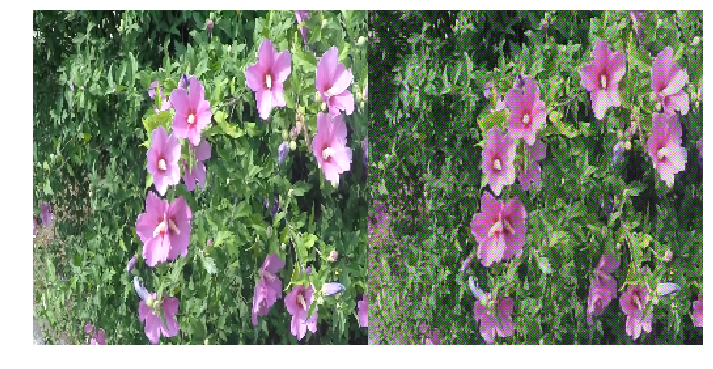

In [28]:
plt.figure(figsize=(12, 8))
plt.imshow(output)
plt.axis('off')